In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
try:
    df = pd.read_csv("/content/data.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("/content/data.csv", encoding='latin1')
df = df[["no2"]].dropna()

x = df["no2"].values

/tmp/ipython-input-3639729933.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding='latin1')


In [ ]:

r = 102317196

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

z = x + a_r * np.sin(b_r * x)


In [ ]:
mu = np.mean(z)
sigma2 = np.var(z)
lambda_ = 1 / (2 * sigma2)
c = np.sqrt(lambda_ / np.pi)

mu, lambda_, c


(np.float64(25.8132695310288),
 np.float64(0.0014605747435028835),
 np.float64(0.021561896492825534))

In [ ]:
def pdf(z, mu, lambda_, c):
    return c * np.exp(-lambda_ * (z - mu)**2)


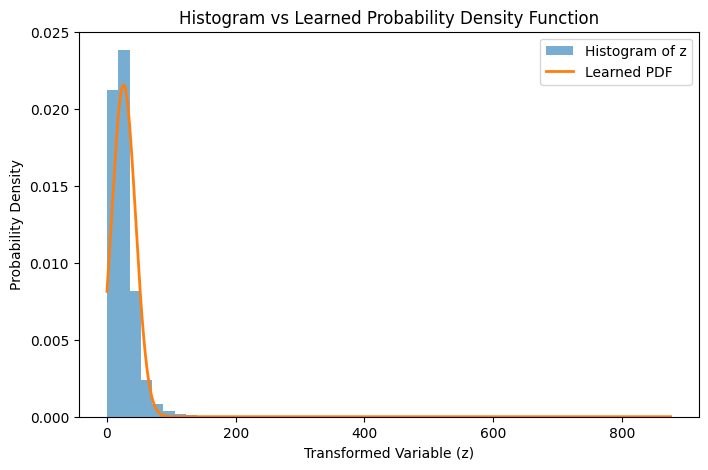

In [ ]:
z_range = np.linspace(min(z), max(z), 1000)
pdf_values = pdf(z_range, mu, lambda_, c)

plt.figure(figsize=(8,5))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Histogram of z")
plt.plot(z_range, pdf_values, label="Learned PDF", linewidth=2)
plt.xlabel("Transformed Variable (z)")
plt.ylabel("Probability Density")
plt.title("Histogram vs Learned Probability Density Function")
plt.legend()
plt.show()


In [ ]:
results = pd.DataFrame({
    "Parameter": ["μ (Mean)", "λ (Lambda)", "c (Normalization Constant)"],
    "Value": [mu, lambda_, c]
})

results


,Parameter,Value
0,μ (Mean),25.813270
1,λ (Lambda),0.001461
2,c (Normalization Constant),0.021562


In [ ]:
results.to_csv("parameter_table.csv", index=False)
